In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('Crop_recommendation.csv')
df.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<AxesSubplot:xlabel='label', ylabel='temperature'>

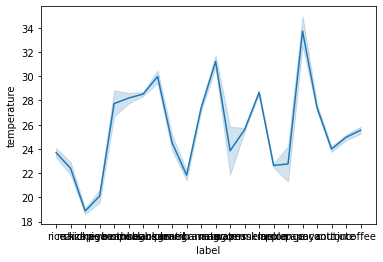

In [5]:
sns.lineplot(x='label',y='temperature', data=df, figsize=(15,8))

<AxesSubplot:xlabel='temperature', ylabel='humidity'>

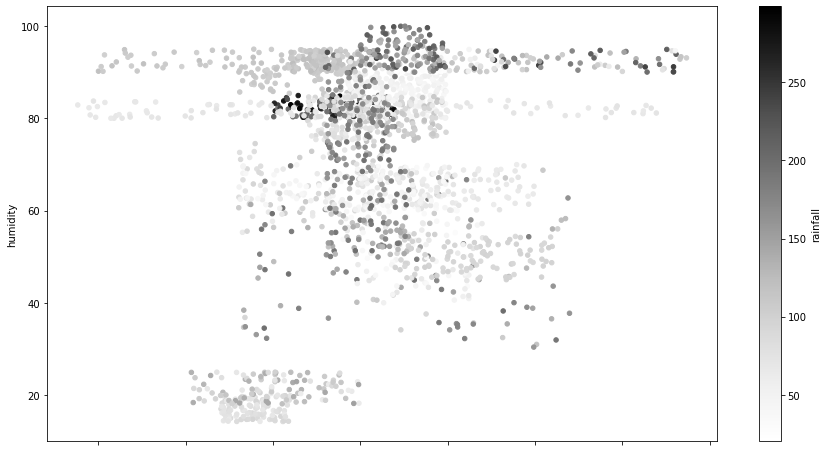

In [6]:
df.plot.scatter(x='temperature' , y='humidity' ,c='rainfall', figsize=(15,8))

<AxesSubplot:>

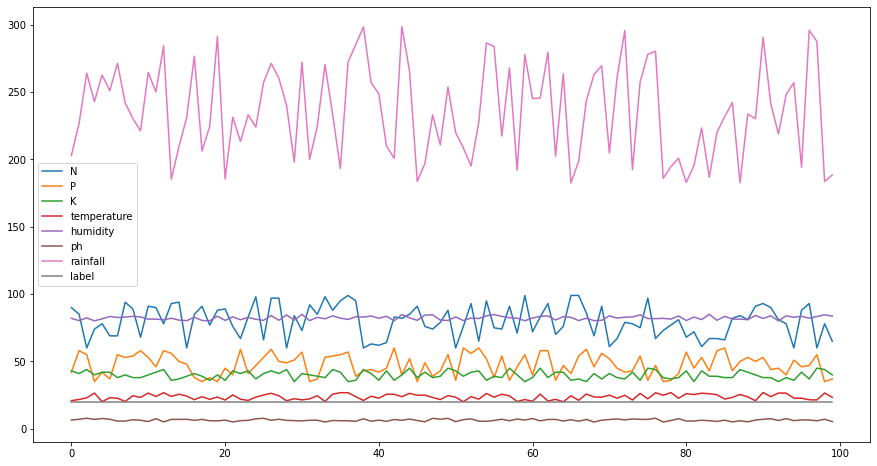

In [22]:
df.head(100).plot( figsize=(15,8))

In [7]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['label']=label_encoder.fit_transform(df['label'])
df['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [17]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
y=df['label']
x=df
x.drop('label',axis=1,inplace=True)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1)
x_train.shape

(1650, 7)

In [10]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#x_train=scaler.fit_transform(x_train)
#x_test=scaler.transform(x_test)
# # test data keo scaling kora holo karon, train data die train korar pore test korte scaling data lagbe

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9781818181818182

In [13]:
model.predict([[60,36,43,23.43,83.06,5.28,219.90]])

array([20])

In [18]:
model.predict([[59,70,84,17.3348681,18.74926979,7.550808267000001,82.61734721]])

array([3])

In [15]:
model.predict([[66,54,21,25.19008683,60.200168700000006,5.919045532,72.12375573]])

array([11])

In [20]:
import pickle
file=open("crop_recommendation.pkl","wb")
pickle.dump(model,file)
file.close()

In [21]:
file=open("crop_recommendation.pkl","rb")
data=pickle.load(file)
file.close()
data

KNeighborsClassifier()

In [22]:
data.predict([[60,36,43,23.43,83.06,5.28,219.90]])

array([20])

In [23]:
data.predict([[59,70,84,17.3348681,18.74926979,7.550808267000001,82.61734721]])

array([3])

In [24]:
data.predict([[66,54,21,25.19008683,60.200168700000006,5.919045532,72.12375573]])

array([11])

In [25]:
df.iloc[255]

N                     56
P                     67
K                     78
temperature    17.574456
humidity       16.718266
ph              8.255451
rainfall       77.818914
label           chickpea
Name: 255, dtype: object

In [27]:
df.iloc[125]

N                     79
P                     51
K                     16
temperature    25.337977
humidity        68.49836
ph              6.586245
rainfall       96.463802
label              maize
Name: 125, dtype: object